In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_categorias_autores=pd.read_csv("logCT2.csv",index_col=0)
df_categorias_autores

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time
...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time


In [4]:
len(df_categorias_autores['concept:name'].unique())

56

In [5]:
len(df_categorias_autores['Specific operation'].unique())

105

In [6]:
len(df_categorias_autores['case:concept:name'].unique())

126

In [3]:
#Operaciones por bpi

In [4]:
tipos_op_agrupado_años=df_categorias_autores.groupby("Year")['Type'].value_counts()

In [5]:
sumAños=[tipos_op_agrupado_años[tipos_op_agrupado_años.index.get_level_values('Year')==val].sum() for val in [2015,2017,2019,2020]]

In [6]:
for index,value in tipos_op_agrupado_años.items():
    if 2015 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[0])*100
    elif 2017 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[1])*100
    elif 2019 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[2])*100
    elif 2020 in index:
        tipos_op_agrupado_años[index]=(value/sumAños[3])*100

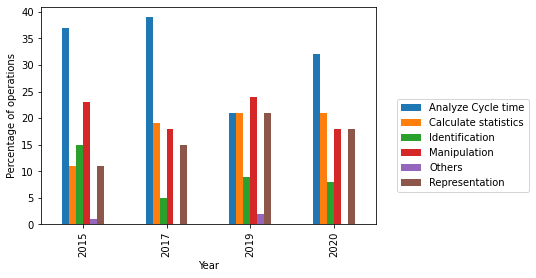

In [7]:
tipos_op_agrupado_años.unstack().plot(kind='bar')
plt.legend(["Analyze Cycle time","Calculate statistics","Identification","Manipulation","Others","Representation"],bbox_to_anchor = (1.05, 0.6))
plt.ylabel("Percentage of operations")
plt.show()

In [8]:
#Operaciones/variantes comunes entre BPI

In [12]:
type(df_categorias_autores['Year'][0])

numpy.int64

In [30]:
years1=[2015,2017,2019,2020]
years2=[2015,2017,2019,2020]
df = pd.DataFrame(index=[2015,2017,2019,2020],columns=[2015,2017,2019,2020])
for year1 in years1:
    operationsYear1=df_categorias_autores[df_categorias_autores["Year"]==year1]
    listaCoincidencias=[]
    for year2 in years2:
        operationsYear2=df_categorias_autores[df_categorias_autores["Year"]==year2]
        intersec=len(list(set(operationsYear1["concept:name"]).intersection(set(operationsYear2["concept:name"]))))
        if(year1==year2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[year1]=listaCoincidencias

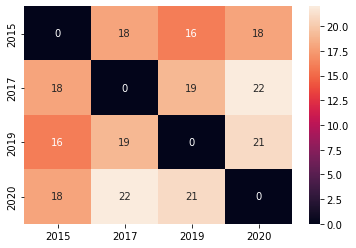

In [31]:
sns.heatmap(df, annot=True)

In [33]:
df2 = pd.DataFrame(index=[2015,2017,2019,2020],columns=[2015,2017,2019,2020])
for year1 in years1:
    operationsYear1=df_categorias_autores[df_categorias_autores["Year"]==year1]
    listaCoincidencias=[]
    for year2 in years2:
        operationsYear2=df_categorias_autores[df_categorias_autores["Year"]==year2]
        intersec=len(list(set(operationsYear1["Specific operation"]).intersection(set(operationsYear2["Specific operation"]))))
        if(year1==year2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[year1]=listaCoincidencias

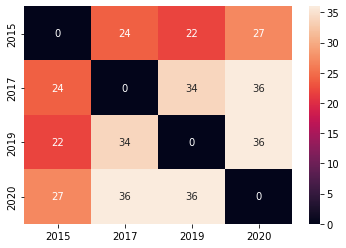

In [34]:
sns.heatmap(df2, annot=True)